<img style="float:left" width="70%" src="../../documentacion/imagenes/escudo_COLOR_1L_DCHA.png">
<img style="float:right" width="10%" src="../../documentacion/imagenes/PythonLogo.svg">
<br style="clear:both;">


<h2 style="display: inline-block; padding: 4mm; padding-left: 2em; background-color: navy; line-height: 1.3em; color: white; border-radius: 10px;">8. Deep Learning LSTM</h2>


 
## Estudiante:

- Jose Luis Perez Gomez

In [11]:
%run 3.Importaciones.ipynb
%run 4.Variables_Clases.ipynb

In [12]:
experimento_1_nor = pd.read_csv('../datos/experimento_stscaler_1.csv', sep=',')
experimento_2_nor = pd.read_csv('../datos/experimento_stscaler_2.csv', sep=',')
experimento_3_nor = pd.read_csv('../datos/experimento_stscaler_3.csv', sep=',')
experimento_4_nor = pd.read_csv('../datos/experimento_stscaler_4.csv', sep=',')
experimento_all_nor = pd.read_csv('../datos/experimento_stscaler_all.csv', sep=',')

experimentos_nor = [experimento_1_nor, experimento_2_nor, experimento_3_nor, experimento_4_nor]
experimentos_name = {'experimento_1':experimento_1_nor, 'experimento_2':experimento_2_nor, 'experimento_3':experimento_3_nor,'experimento_4':experimento_4_nor}

experimentos = [("experimento_1", experimento_1_nor), 
                ("experimento_2", experimento_2_nor), 
                ("experimento_3", experimento_3_nor), 
                ("experimento_4", experimento_4_nor)]

In [13]:
from sklearn.exceptions import ConvergenceWarning
from sklearn.exceptions import UndefinedMetricWarning
import warnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)

In [14]:


# Plot del training loss y accuracy
def print_chart(title, xaxis, yaxis, lines_values, lines_titles):
    """
    Visualización de la pérdida
    IN: title - título de la gráfica
        xaxis - título del eje X
        yaxis - título del eje Y
        lines - lista de series de valores
    """
    for line in lines_values:
        plt.plot(line)
    plt.title(title)
    plt.xlabel(xaxis)
    plt.ylabel(yaxis)
    plt.legend(lines_titles, loc='best')
    plt.show()
    

class PlotLearning(Callback):
    """
    Callback para plotear las métricas durante el entrenamiento.
    """
    def __init__(self, showLR=False):
      self.showLR = showLR              

    def on_train_begin(self, logs={}):
        self.metrics = {}
        for metric in logs:
            self.metrics[metric] = []
            

    def on_epoch_end(self, epoch, logs={}):
        for metric in logs:
            if metric in self.metrics:
                self.metrics[metric].append(logs.get(metric))
            else:
                self.metrics[metric] = [logs.get(metric)]
        
        metric = [x for x in logs if ('val' not in x) and ('lr' not in x)]
        if self.showLR:
          metric.append('lr')
        
        f, axs = plt.subplots(1,len(metric),figsize=(10,4))
        clear_output(wait=True)
        for i,ax in enumerate(axs):
          ax.plot(range(1, epoch + 2), self.metrics[metric[i]],'o--',label=metric[i])
          try:
            ax.plot(range(1, epoch + 2), self.metrics['val_' + metric[i]], 'o--', label='val_' + metric[i])
          except:
            pass
          ax.set_xlabel('# epochs')
          ax.set_ylabel(metric[i])
          ax.legend()
          ax.grid()

        plt.tight_layout()
        plt.show()
        
class TimerCallback(Callback):
    
    def on_train_begin(self, logs={}):
        self.times = []
        self.start_time = time.time()

    def on_epoch_end(self, batch, logs={}):
        self.times.append(time.time() - self.start_time)
        print(f"Tiempo requerido: {self.times[-1]:.2f} segundos.")
        


# LSTM (Long short-term memory)

In [15]:

experimento_prueba = experimento_1_nor.drop(['Timestamp'], axis=1)
X_train, y_train, X_val, y_val, X_test, y_test = dividir_datos(experimento_prueba)

In [16]:



X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_val = X_val.reshape((X_val.shape[0], 1, X_val.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))


In [17]:
# Definición del modelo
timesteps = 30
features = 10

lstm_model = Sequential()
lstm_model.add(LSTM(units=60, input_shape=(timesteps, features), return_sequences=True))
lstm_model.add(LSTM(units=30))
lstm_model.add(Dropout(0.5))
lstm_model.add(Dense(5, activation='softmax'))

# Compilación del modelo
lstm_model.compile(optimizer='adam', metrics=['accuracy'], loss='sparse_categorical_crossentropy')

# Se imprime el resumen del modelo
lstm_model.summary()

C:\Users\Casa\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 30, 60)              │          17,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 30)                  │          10,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 30)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │             155 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 28,115 (109.82 KB)

 Trainable params: 28,115 (109.82 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
# Definir early stopping
early_stopping_lstm = EarlyStopping(monitor='val_loss', patience=5, verbose=1)
plot_learning_lstm = PlotLearning()
timer_callback_lstm = TimerCallback()
reduce_rl_lstm = ReduceLROnPlateau(patience=5, monitor='loss')
model_checkpoint_lstm = ModelCheckpoint('weights/lstm.keras', monitor='val_loss', save_best_only=True)

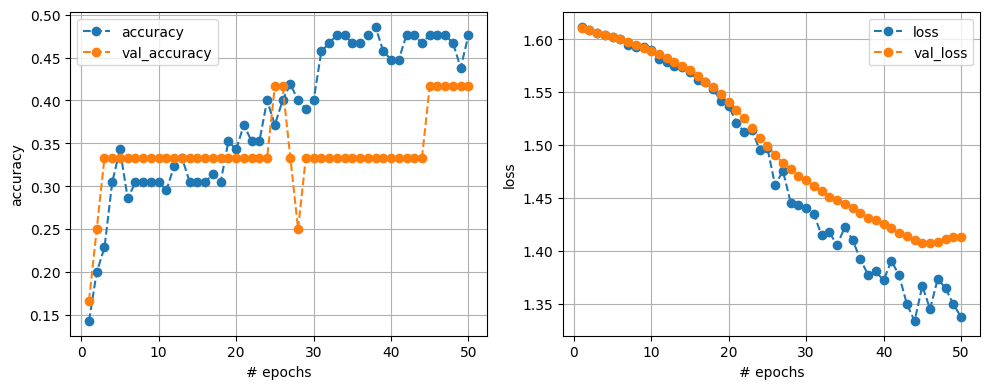

Tiempo requerido: 63.42 segundos.
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 318ms/step - accuracy: 0.4705 - loss: 1.3794 - val_accuracy: 0.4167 - val_loss: 1.4126 - learning_rate: 1.0000e-04
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 643ms/step
***
[[0.18542728 0.20610352 0.21409214 0.20121343 0.19316366]
 [0.8418459  0.02644962 0.06394334 0.03409022 0.03367091]
 [0.17650774 0.21435115 0.21988751 0.20250532 0.18674831]
 [0.2792068  0.19050846 0.18010932 0.17987907 0.17029633]
 [0.08410509 0.139215   0.16518873 0.22944012 0.38205105]
 [0.14732344 0.21743734 0.24424186 0.20717427 0.18382306]
 [0.07902564 0.1780486  0.24496707 0.23163518 0.26632348]
 [0.13764311 0.20357895 0.22101897 0.21702799 0.22073099]
 [0.25209454 0.1541014  0.13857445 0.19043843 0.2647912 ]
 [0.15826075 0.20718856 0.22006309 0.20979226 0.20469537]
 [0.14286663 0.2061386  0.23160835 0.21287382 0.20651253]
 [0.17246205 0.13182478 0.12690173 0.2012876  0.36752382]]
***
[2 0 2 0 4 2 4 2 4 2 2 4]
***
Accuracy: 0.4166666666666667
Classification Repor

In [19]:
#https://medium.com/@yousufdata/6-tips-to-tweak-your-lstm-bilstm-15fd02685c8
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)

# Se entrena el modelo
lstm_model_trained = lstm_model.fit(X_train, y_train, epochs=50, batch_size=30, validation_data=(X_val, y_val), callbacks=[early_stopping_lstm,plot_learning_lstm,timer_callback_lstm,reduce_rl_lstm,model_checkpoint_lstm])

y_pred = lstm_model.predict(X_val)
print('***')
print(y_pred)
print('***')
y_pred_classes = np.argmax(y_pred, axis=1)
print (y_pred_classes)
print('***')

# Calcula la precisión
accuracy = accuracy_score(y_val, y_pred_classes)
print("Accuracy:", accuracy)

# Muestra el informe de clasificación
print("Classification Report:")
print(classification_report(y_val, y_pred_classes))

# Muestra la matriz de confusión
print("Confusion Matrix:")
print(confusion_matrix(y_val, y_pred_classes))   
    

 
print('********************************************************')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.3846 - loss: 1.2917
Loss: 1.2916548252105713
Accuracy: 0.38461539149284363


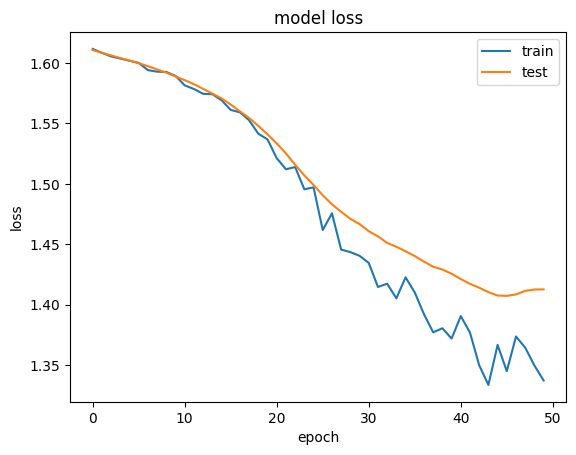

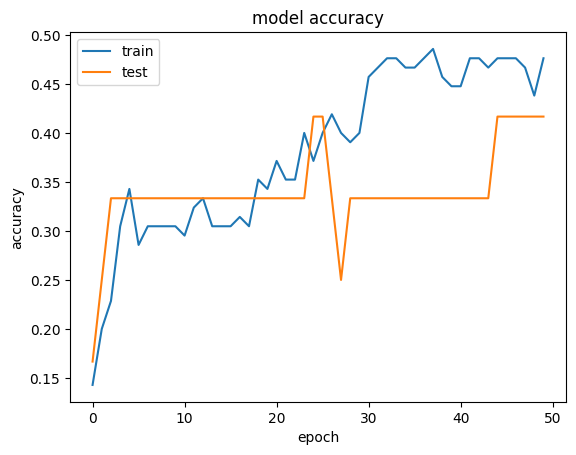

In [20]:
lstm_loss, lstm_accuracy = lstm_model.evaluate(X_test, y_test)
print(f'Loss: {lstm_loss}')
print(f'Accuracy: {lstm_accuracy}')

print_chart("model loss", "epoch", "loss", [lstm_model_trained.history['loss'], lstm_model_trained.history['val_loss']], ['train', 'test'])
print_chart("model accuracy", "epoch", "accuracy", [lstm_model_trained.history['accuracy'], lstm_model_trained.history['val_accuracy']], ['train', 'test'])
